## Setup

In [213]:
#1 - The project requires Python 3.7 or above:

import sys

assert sys.version_info >= (3, 7)

In [214]:
#2 - Scikit-Learn >= 1.0.1 is required

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

In [215]:
#3 - Define the default font sizes, to plot pretty figures

import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=12)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)


In [216]:
#4 - Making this notebook output stable across run

import numpy as np

np.random.seed(42)

## 2) Code Example 1-1

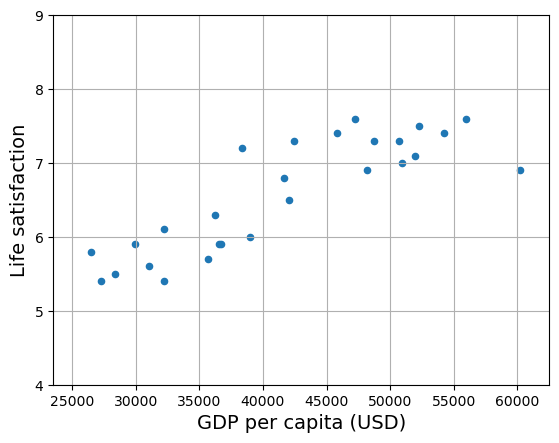

[[6.30165767]]


In [217]:
#5 - Exploring data with visualization and prediction

# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from pathlib import Path

# Download and prepare the data
# columns - GDP per capita (USD) & Life satisfaction
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv" )
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data   - 23_500, 62_500, 4, 9
lifesat.plot(kind="scatter", grid=True,
             x = "GDP per capita (USD)",
             y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# # Select a linear model 
model = LinearRegression()

# #Train the model
model.fit(X,y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]
print(model.predict(X_new))


In [218]:
## Select K-neighbours
model = KNeighborsRegressor()
model.fit(X,y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.26]]


In [219]:
## sample program for tight_layout=True
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(2, 2, tight_layout=True)
# for i in range(2):
#     for j in range(2):
#         ax[i, j].set_title(f"Plot {i}{j}")
# plt.show()


In [220]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 3) Load and prepare Life satisfaction data

In [221]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

# "https://github.com/ageron/data/raw/main/" - Github path
# filename = "oecd_bli.csv", "gdp_per_capita.csv"

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading ", filename)
        
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)


In [222]:
# Read CSV
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [223]:
value_count = oecd_bli["INEQUALITY"].value_counts()
print(value_count)
# oecd_bli["Inequality"].unique()
# oecd_bli

INEQUALITY
TOT    911
MN     578
WMN    578
HGH    164
LW     138
Name: count, dtype: int64


In [224]:
gdp_per_capita.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [225]:
## Preprocess the GDP data to keep only the year 2020
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

# set_year, drop_column, modify_columns, set_index
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"]==gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)


In [226]:
gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [227]:
# Preprocess the OECD BLI data to keep only the 'Life satisfaction' column
# type(oecd_bli)
# oecd_bli.info() #columns
# oecd_bli.value_counts()
# oecd_bli.head()

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [228]:
# Now let's merge the life satisfaction data and the GDP per capita data, keeping only the GDP per capita and Life satisfaction columns
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)

full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [229]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]

# country_stats= country_stats.sort_values(by=lifesat_col)

country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [230]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

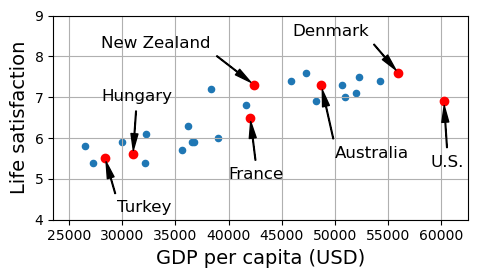

In [231]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('money_happy_scatterplot')
plt.show()

In [232]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)
# print(highlighted_countries)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


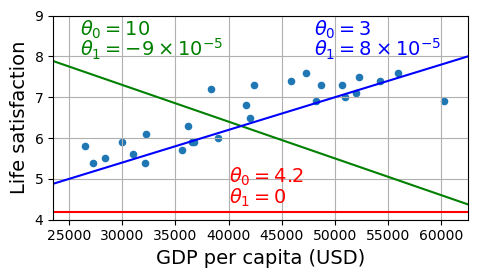

In [233]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('tweaking_model_params_plot')
plt.show()